('Currently at State', 0)
('Currently at State', 1)
('Currently at State', 2)
('Currently at State', 3)
('Currently at State', 4)
we made it this far
('Valnew length:', 5)
('Valold length:', 5)
('Valnew length:', 5)
('Valold length:', 5)
('Valnew length:', 5)
('Valold length:', 5)


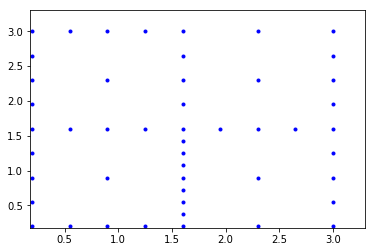

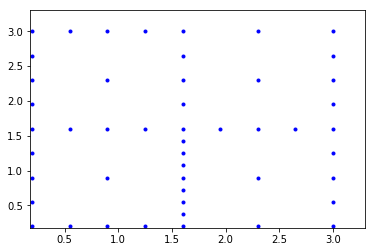

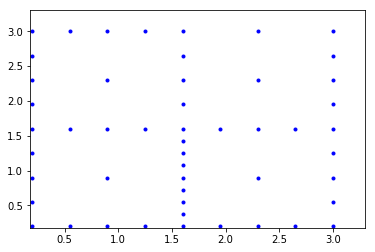

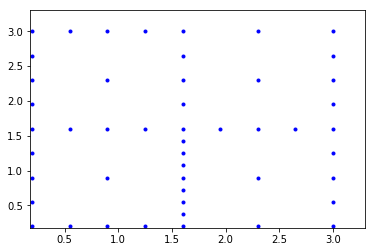

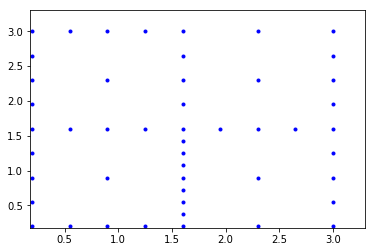

 
(' Computation of a growth model of dimension ', 2, ' finished after ', 3, ' steps')
 
 
 Errors are computed -- see errors.txt
 


In [2]:

#======================================================================

import nonlinear_solver_initial as solver     #solves opt. problems for terminal VF
import nonlinear_solver_iterate as solviter   #solves opt. problems during VFI
from parameters import *                      #parameters of model
import interpolation as interpol              #interface to sparse grid library/terminal VF
import interpolation_iter as interpol_iter    #interface to sparse grid library/iteration
import postprocessing as post                 #computes the L2 and Linfinity error of the model

import TasmanianSG                            #sparse grid library
import numpy as np
import copy

import matplotlib.pyplot as plt
import numpy as np
from random import uniform
from mpl_toolkits.mplot3d import Axes3D

#======================================================================
# Start with Value Function Iteration

# terminal value function
valnew0=TasmanianSG.TasmanianSparseGrid()
valnew1=TasmanianSG.TasmanianSparseGrid()
valnew2=TasmanianSG.TasmanianSparseGrid()
valnew3=TasmanianSG.TasmanianSparseGrid()
valnew4=TasmanianSG.TasmanianSparseGrid()
valnew = [valnew0, valnew1, valnew2, valnew3, valnew4]
for z in zlist:
        print("Currently at State", z)
        valnew[z] = interpol.sparse_grid_adapt(n_agents, iDepth, z)

# value function during iteration

print("we made it this far")
valold = [0,0,0,0,0]
for z in zlist:
    valold[z] = valnew[z]

for i in range(numstart, numits):
        valnew0=TasmanianSG.TasmanianSparseGrid()
        valnew1=TasmanianSG.TasmanianSparseGrid()
        valnew2=TasmanianSG.TasmanianSparseGrid()
        valnew3=TasmanianSG.TasmanianSparseGrid()
        valnew4=TasmanianSG.TasmanianSparseGrid()
        valnew = [valnew0, valnew1, valnew2, valnew3, valnew4]
        for z in zlist:
                valnew[z] = (interpol_iter.sparse_grid_iter_adapt(n_agents, iDepth, valold, z))
        print("Valnew length:", len(valnew))
        print("Valold length:", len(valold))
        for z in zlist:
                valold[z] = valnew[z]

for z in zlist:
    valnew[z].plotPoints2D()



#======================================================================
print( "===============================================================")
print( " " )
print( " Computation of a growth model of dimension ", n_agents ," finished after ", numits, " steps")
print( " " )
print( "===============================================================")
#======================================================================

# compute errors
avg_err=post.ls_error(n_agents, numstart, numits, No_samples)


#======================================================================
print( "===============================================================")
print( " ")
print( " Errors are computed -- see errors.txt")
print( " ")
print( "===============================================================")
#======================================================================

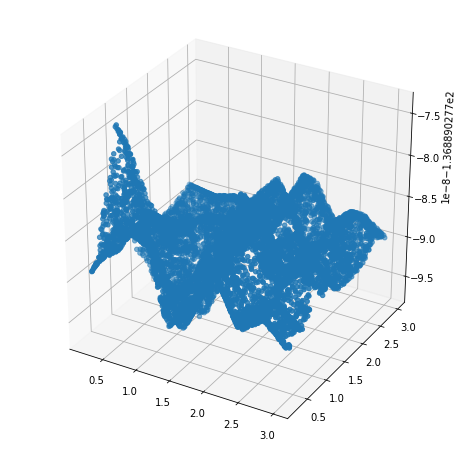

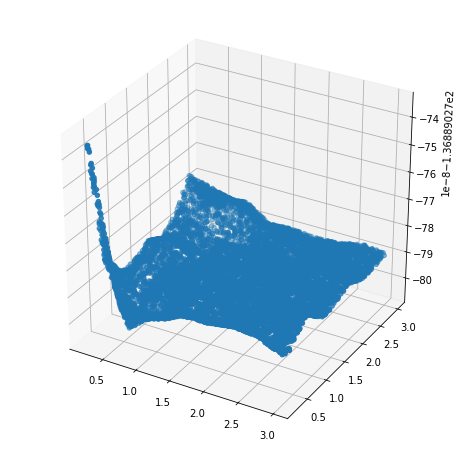

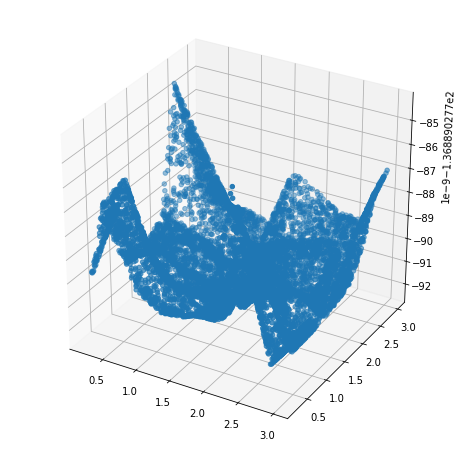

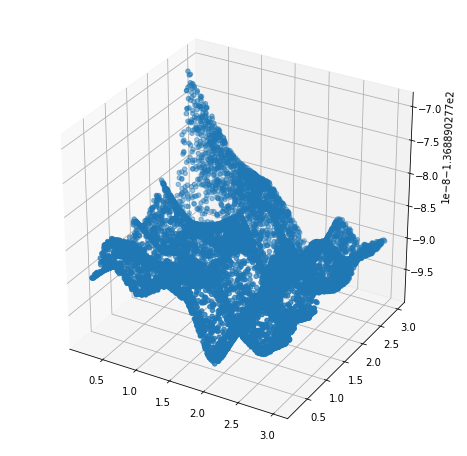

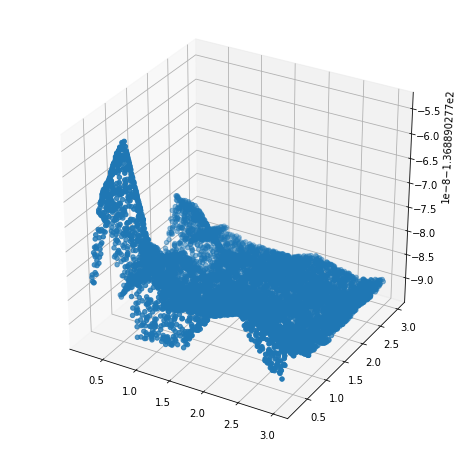

In [3]:
aPnts = np.empty([10000, 2])  
for iI in range(aPnts.shape[0]):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(0.2, 3)
        
aRes = np.empty([aPnts.shape[0],5])
for i in range(5):
    for j in range(aPnts.shape[0]):
        kj = np.array([aPnts[j]])
        aRes[j,i] = valnew[i].evaluateBatch(kj) # Evaluate the interpolant at the cartesian grid
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter3D(aPnts[:,0], aPnts[:,1], aRes[:,i])
    plt.show()